In [1]:
import pandas as pd
import numpy as np
import glob
from IPython.display import clear_output
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("paper")
sns.set(font_scale=1.5)
%load_ext autoreload
%autoreload 2

batch_size = 80
max_iter = 50
active_col = 'PstP True Active'
cluster_col = 'BT_0.4 ID'
pstp_file = '../../ALDD-PstP-Results/results/setting_true/training_data/cumulative_50.csv.gz'

res_list = []
for i in range(max_iter):
    tmp_df = pd.read_csv('../../ALDD-PstP-Results/results/setting_true/next_batch/iter_{}.csv.gz'.format(i))
    tmp_df['iter_num'] = i
    res_list.append(tmp_df)
    
tmp_df = pd.concat(res_list)[['Index ID', 'iter_num']]
res_df = pd.read_csv(pstp_file)
res_df = pd.merge(tmp_df, res_df, on='Index ID')
assert tmp_df['Index ID'].unique().shape[0] == batch_size*max_iter
assert res_df['Index ID'].unique().shape[0] == batch_size*max_iter

In [2]:
total_hits = res_df[res_df[active_col] == 1].shape[0]
total_unique_hits = res_df[res_df[active_col] == 1][cluster_col].unique().shape[0]

print('Batch size: {}. # iters: {}. Total selected cpds: {}.'.format(batch_size, max_iter, res_df.shape[0]))
print('Total hits: {}. Total unique hits: {}.'.format(total_hits, total_unique_hits))

Batch size: 80. # iters: 50. Total selected cpds: 4000.
Total hits: 29. Total unique hits: 27.


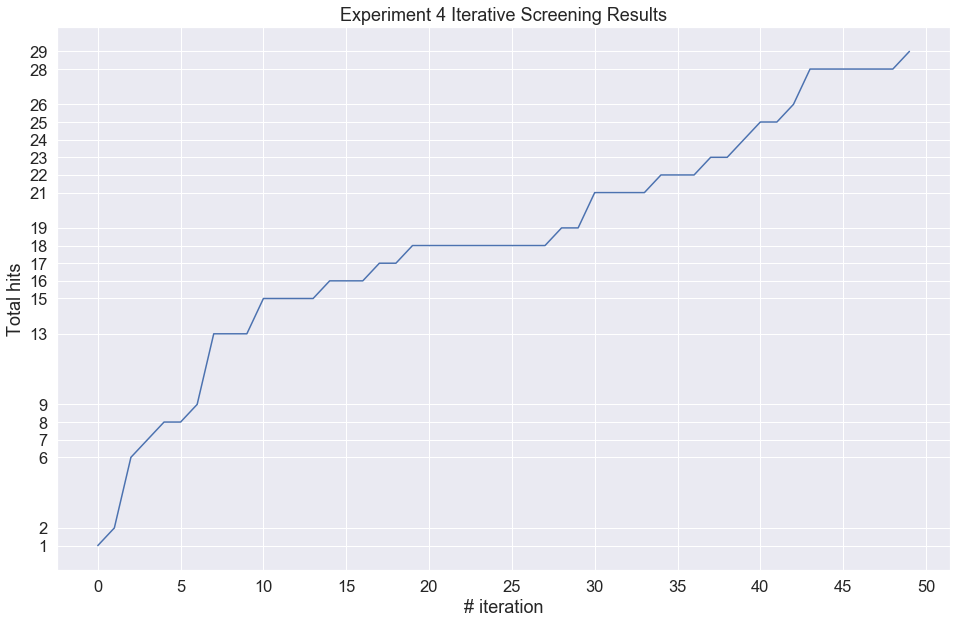

In [3]:
hit_list = []
for i in range(max_iter):
    tmp_df = res_df[res_df['iter_num'] == i]
    cumsum = tmp_df[active_col].sum()
    if i > 0:
        cumsum += hit_list[i-1]  
    hit_list.append(cumsum)

plt.figure(figsize=(16, 10));
sns.lineplot(x=np.arange(max_iter), y=hit_list);
plt.xticks([i*5 for i in range(11)]); plt.yticks(np.unique(hit_list));
plt.ylabel('Total hits');plt.xlabel('# iteration');plt.title('Experiment 4 Iterative Screening Results');